Mean Squared Error: 1.52
Test Accuracy (R² Score): 96.95%


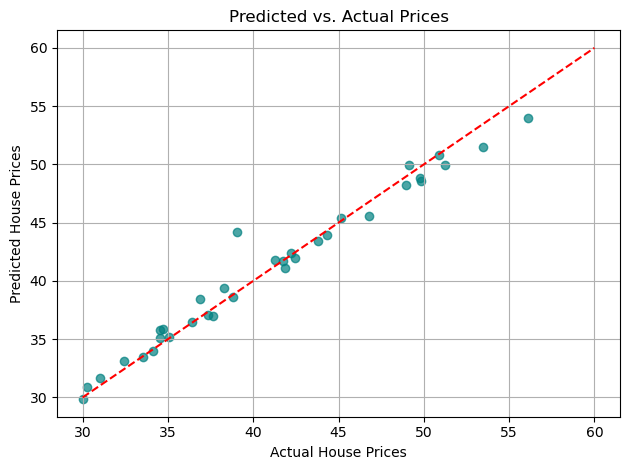

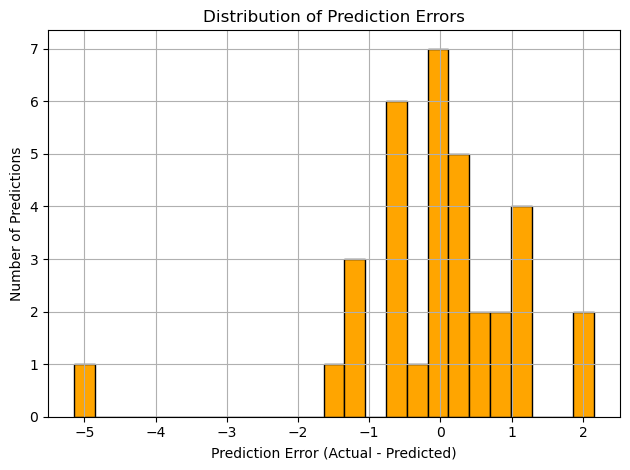

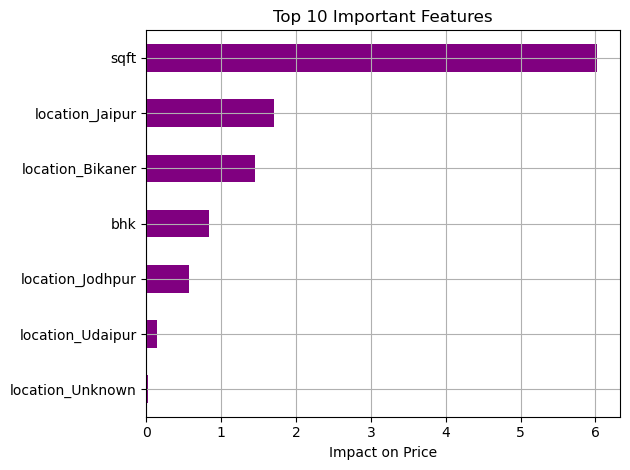

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("C:/Users/hardi/Downloads/house_predict.csv")

#Data Preprocessing

#Drop column 'serial_no'
data.drop(['serial_no'], axis=1, inplace=True)

# Drop rows where target variable 'price' is missing
data.dropna(subset=['price'], inplace=True)

# Fill missing values 
data["location"].fillna("Unknown", inplace=True)

# Separate features and target
X = data.drop('price', axis=1)
y = data['price']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Test Accuracy (R² Score): {r2 * 100:.2f}%")


# In[3]:


# --------- 🔹 Visualization 1: Actual vs Predicted Prices ----------

plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs. Actual Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- 🔹 Visualization 2: Prediction Error Histogram ----------
errors = y_test - y_pred

plt.hist(errors, bins=25, color='orange', edgecolor='black')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- 🔹 Visualization 3: Feature Importance ----------
coefficients = pd.Series(model.coef_, index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False)
top_features.sort_values().plot(kind='barh', color='purple')
plt.xlabel('Impact on Price')
plt.title('Top 10 Important Features')
plt.grid(True)
plt.tight_layout()
plt.show()

